<a href="https://colab.research.google.com/github/jnarayan81/100-Days-Of-ML-Code/blob/master/De_Bruijn_Graph_assembly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gvmagic

  Created wheel for gvmagic: filename=gvmagic-0.5-cp36-none-any.whl size=10374 sha256=3e0016e085d4f167df4f68500697e9d36786971697605fae4429c7ea72d78b43
  Stored in directory: /root/.cache/pip/wheels/f6/67/1f/64d62350d4cffe0a94e39af37828a6a5bfba1b9b9d6d95dbf8
Successfully built gvmagic


In [ ]:
import gvmagic

In [ ]:
def debruijnize(reads):
    nodes = set()
    not_starts = set()
    edges = []
    for r in reads:
        r1 = r[:-1]
        r2 = r[1:]
        nodes.add(r1)
        nodes.add(r2)
        edges.append((r1,r2))
        not_starts.add(r2)
    return (nodes,edges,list(nodes-not_starts))


def build_k_mer(str,k):
    return [str[i:k+i] for i in range(0,len(str)-k+1)]


def make_node_edge_map(edges):
    node_edge_map = {}
    for e in edges:
        n = e[0]
        if n in node_edge_map:
            node_edge_map[n].append(e[1])
        else:
            node_edge_map[n] = [e[1]]
    return node_edge_map


def eulerian_trail(m,v):
    nemap = m
    result_trail = []
    start = v
    result_trail.append(start)
    while(True):
        trail = []
        previous = start
        while(True):
            
            if(previous not in nemap):
                break
            next = nemap[previous].pop()
            if(len(nemap[previous]) == 0):
                nemap.pop(previous,None)
            trail.append(next)
            if(next == start):
                break;
            previous = next
        # completed one trail
        print(trail)
        index = result_trail.index(start)
        result_trail = result_trail[0:index+1] + trail + result_trail[index+1:len(result_trail)]
        # choose new start
        if(len(nemap)==0):
          break
        found_new_start = False
        for n in result_trail:
            if n in nemap:
                start = n
                found_new_start = True
                break # from for loop
        if not found_new_start:
            print("error")
            print("result_trail",result_trail)
            print(nemap)
            break
    return result_trail
def visualize_debruijn(G):
    nodes = G[0]
    edges = G[1]
    dot_str= 'digraph "DeBruijn graph" {\n '
    for node in nodes:
        dot_str += '    %s [label="%s"] ;\n' %(node,node)
    for src,dst in edges:
        dot_str += '    %s->%s;\n' %(src,dst)
    return dot_str + '}\n'


def assemble_trail(trail):
    if len(trail) == 0:
        return ""
    result = trail[0][:-1]
    for node in trail:
        result += node[-1]
    return result
def test_assembly_debruijn(t,k):
    reads = build_k_mer(t,k)
    G = debruijnize(reads)
    v = visualize_debruijn(G)
    nemap = make_node_edge_map(G[1])
    print(G)
    print(v)
    start = next(iter(G[2])) if (len(G[2]) > 0) else next(iter(G[0]))
    trail = eulerian_trail(nemap,start)
    return assemble_trail(trail)

In [ ]:
reads = build_k_mer("ATCGTTGCGCGACCG",4)
print(reads)

['ATCG', 'TCGT', 'CGTT', 'GTTG', 'TTGC', 'TGCG', 'GCGC', 'CGCG', 'GCGA', 'CGAC', 'GACC', 'ACCG']


In [ ]:
G = debruijnize(reads)
print(G)

({'CGC', 'TGC', 'CGT', 'TTG', 'CGA', 'ATC', 'GTT', 'CCG', 'GAC', 'GCG', 'ACC', 'TCG'}, [('ATC', 'TCG'), ('TCG', 'CGT'), ('CGT', 'GTT'), ('GTT', 'TTG'), ('TTG', 'TGC'), ('TGC', 'GCG'), ('GCG', 'CGC'), ('CGC', 'GCG'), ('GCG', 'CGA'), ('CGA', 'GAC'), ('GAC', 'ACC'), ('ACC', 'CCG')], ['ATC'])


In [ ]:
m = make_node_edge_map(G[1])
print(m)

{'ATC': ['TCG'], 'TCG': ['CGT'], 'CGT': ['GTT'], 'GTT': ['TTG'], 'TTG': ['TGC'], 'TGC': ['GCG'], 'GCG': ['CGC', 'CGA'], 'CGC': ['GCG'], 'CGA': ['GAC'], 'GAC': ['ACC'], 'ACC': ['CCG']}


In [ ]:
start = G[2][0] if (len(G[2]) > 0) else G[0][0]
print (m)


{'ATC': ['TCG'], 'TCG': ['CGT'], 'CGT': ['GTT'], 'GTT': ['TTG'], 'TTG': ['TGC'], 'TGC': ['GCG'], 'GCG': ['CGC', 'CGA'], 'CGC': ['GCG'], 'CGA': ['GAC'], 'GAC': ['ACC'], 'ACC': ['CCG']}


In [ ]:
t = eulerian_trail(m,start)
print(t)

['TCG', 'CGT', 'GTT', 'TTG', 'TGC', 'GCG', 'CGA', 'GAC', 'ACC', 'CCG']
['CGC', 'GCG']
['ATC', 'TCG', 'CGT', 'GTT', 'TTG', 'TGC', 'GCG', 'CGC', 'GCG', 'CGA', 'GAC', 'ACC', 'CCG']


In [ ]:
get_ipython().magic(u'load_ext gvmagic')


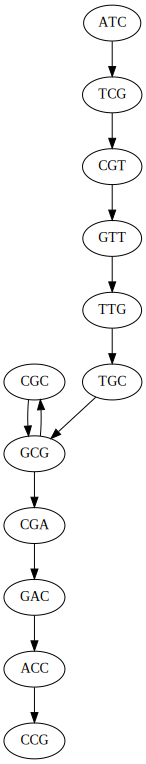

In [ ]:
get_ipython().magic(u'dotstr visualize_debruijn(G)')

In [ ]:
assemble_trail(t)

'ATCGTTGCGCGACCG'